In [2]:
import sys
import numpy as np
import matplotlib
import pandas as pd
import sklearn

print("Python: {}",format(sys.version))
print("Numpy: {}",format(np.__version__))
print("Matplotlib: {}",format(matplotlib.__version__))
print("Pandas: {}",format(pd.__version__))
print("Sklearn: {}",format(sklearn.__version__))

Python: {} 3.5.4 (v3.5.4:3f56838, Aug  8 2017, 02:17:05) [MSC v.1900 64 bit (AMD64)]
Numpy: {} 1.17.2
Matplotlib: {} 3.0.3
Pandas: {} 0.25.1
Sklearn: {} 0.21.3


In [42]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Load the dataset

In [34]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
name = ["id", "clump_thickness", "uniform_cell_size","uniform_cell_shape", "marginal_adhesion", "signle_epithelial_size", "bare_nuclei", "bland_chromatin", "normal_nucleoli", "mitoses", "class"]
df = pd.read_csv(url, names=name)

In [35]:
print(df.head(5))

        id  clump_thickness  uniform_cell_size  uniform_cell_shape  \
0  1000025                5                  1                   1   
1  1002945                5                  4                   4   
2  1015425                3                  1                   1   
3  1016277                6                  8                   8   
4  1017023                4                  1                   1   

   marginal_adhesion  signle_epithelial_size bare_nuclei  bland_chromatin  \
0                  1                       2           1                3   
1                  5                       7          10                3   
2                  1                       2           2                3   
3                  1                       3           4                3   
4                  3                       2           1                3   

   normal_nucleoli  mitoses  class  
0                1        1      2  
1                2        1      2  
2    

In [36]:
#Preprocess the data
df.replace('?', -9999, inplace= True)
print("Columns: ",df.axes)
df.drop(['id'], 1,inplace=True)
print("SHAPE:",df.shape)

Columns:  [RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'signle_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
SHAPE: (699, 10)


In [37]:
print(df.loc[698])

clump_thickness            4
uniform_cell_size          8
uniform_cell_shape         8
marginal_adhesion          5
signle_epithelial_size     4
bare_nuclei                5
bland_chromatin           10
normal_nucleoli            4
mitoses                    1
class                      4
Name: 698, dtype: object


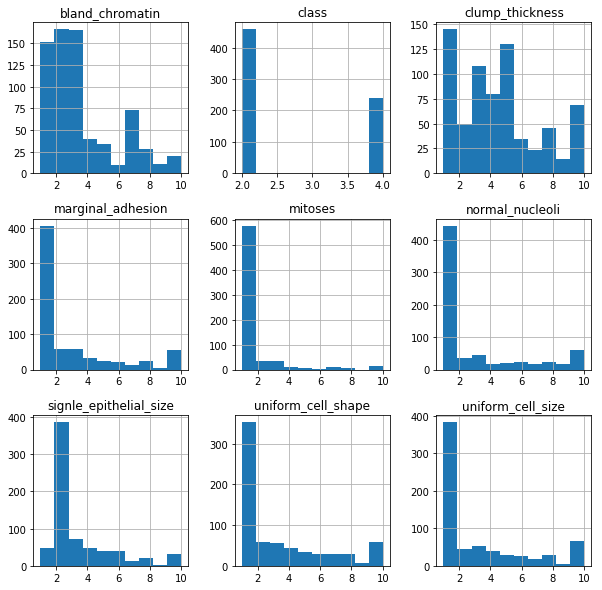

In [38]:
df.hist(figsize=(10,10))
plt.show()

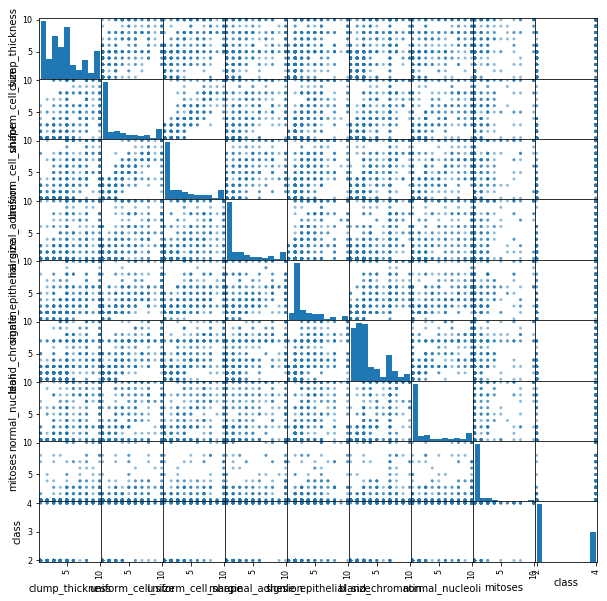

In [39]:
scatter_matrix(df, figsize=(10, 10))
plt.show()

In [48]:
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [49]:
seed = 7
scoring = 'accuracy'

In [50]:
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC()))

results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.964156 (0.021351)
SVM: 0.949935 (0.029636)


c:\users\jayabalaji\appdata\local\programs\python\python35\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\jayabalaji\appdata\local\programs\python\python35\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\jayabalaji\appdata\local\programs\python\python35\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this war